In [1]:
%pylab inline

def extract_(filename, data_line = 1):
    '''
    INPUTS
    
    OUTPUTS
    '''
    # settings
    skiprows = 2
    
    data = loadtxt(filename, skiprows = skiprows)
    
    use_data = []
    for i in data:
        use_data.append(i[data_line])
        
    print('final timestep:',data[-1][0])
    print('number of data points:',len(use_data))

    output_list = [ use_data , data[-1][0] ]
    
    return output_list

def mean_(data):
    '''
    INPUTS
    
    OUTPUTS
    '''
    total = 0
    for i in data:
        total += i
        
    mean = total / len(data)
    return mean


def max(data):
    '''
    Gives maximum of a list or array of data
    '''
    maximum = data[0]
    for n in data:
        if maximum < n:
            maximum = n
    return maximum


def min(data):
    '''
    Gives minimum of a list or array of data
    '''
    minimum = data[0]
    for n in data:
        if minimum > n:
            minimum = n
    return minimum


def gr(data_line = 1, av = True, err = False, verticle = False, units = 'real', start_time = 0, end_time = 'End', loc = 'upper right', con = False, elwt = 'Standard'):
    '''
    Version 25/08/23
    Gives a graph from dat file
    Designed for LAMMPS simulation outputs
    Can output an average, or average w/ standard deviation
    
    Latest Changes: real force units, end_time & data_line arguments
    '''
    print()
    print('# # # # # #')
    print()
    print('Graph version 25/08/2023')
    print()
    print('# # # # # #')
    print()
    
    # import data and output simple analysis (final timestep, number data points, mean) 
    filename = input('Filename (w/out .dat): ')
    
    extraction = extract_(filename+'.dat', data_line)
    y = extraction[0]
    fts = extraction[1]
    
        # Graph annotations
    figure(figsize=[12,7.5])
    ts = input('Timestep Value: ')
    ft = float(ts)*fts
    xlabel('Time (fs) [Timestep = ' + ts + ']')

    yl = input('y-axis label: ')
    if yl == 'Temperature':
        ylu = 'K'
    elif yl == 'Volume':
        ylu = 'A$^{3}$'
    elif yl == 'Pressure':
        ylu = 'atm'
    elif yl == 'Enthalpy':
        ylu = 'kJ mol$^{-1}$'
    elif yl == 'Distance':
        ylu = 'A'
    elif yl == 'Force':
        ylu = 'kcal mol$^{-1}$ A$^{-1}$'
    else:
        ylu = input('y-axis label units: ')
    if units != 'real':
        ylu = input('y-axis label units: ') # bug will result in non real & non T,V,P units being asked for twice
    ylabel(yl + ' (' + ylu + ')' )

    t_i = input('Title: ')
    title(t_i)
    
    pltlabel = 'Instantaneous ' + yl

    if start_time != 0 or end_time != 'End':
        start_data = int(round(start_time*len(y)/fts)) # if invoked by end_time argument, this should be 'inert'
        print('Starting data from data point', start_data)
        print('Ending with data point', end_time)
        if end_time == 'End': # if invoked by start_time argument, end_time should be 'inert'
            end_data = len(y)
        elif type(end_time) == int: # inputs for end_time that are not an integer or 'End' will break function
            end_data = int(round(end_time*len(y)/fts))
            ft = end_time
        y = y[start_data:end_data]
    
    if av == True:
        print('mean:',mean_(y))
    if err == True:
        print('Standard Deviation:', std(y))
    
    
    # output of graphs
    x = linspace(start_time,ft,len(y))
    plot(x, y, color='red',label=pltlabel)

    av_y_label = 'average ' + yl + ' = ' + str(round(mean_(y),1)) + ' ' + ylu
    
    if av == True and err == False:
        plot(linspace(start_time,ft,2),[mean_(y),mean_(y)],color='blue',label=av_y_label)

    elif err == True:
        elw = 10*len(y)/fts
        if elwt != 'Standard':
            elw = float(input('Error bar linewidth: '))
        mean_list = []
        for n in range(len(y)):
            mean_list.append(mean_(y))
        errorbar(x,mean_list,color='blue',label=av_y_label,yerr=std(y),elinewidth=elw)
        
    if verticle == True:
        xvert = float(input('Verticle x-axis position? '))
        plot([xvert,xvert],[min(y),max(y)],color='blue',linestyle='--',linewidth=0.5)
        
    # legend location and figure save
    legend(loc = loc)
    if con == False:
        savefig(filename + '.png')
    else:
        savefig(input('Output graph filename: ') + '.png')

def execute():
    '''
    Executes the graph function, based on inputs given
    
    Compatable with 25/08/2023 Version
    '''
    
    
    inptype = ['data_line', 'av', 'err', 'verticle', 'units', 'start_time', 'end_time' 'loc', 'con', 'elwt']
    inpval_stand  = [1, True, False, False, 'real', 0.0, 'End', 'upper right', False, 'Standard']
    
    v = []
    
    print('Inputs for graph settings:')
    print()
    
    for i in range(len(inptype)):
        
        ask_string = 'Argument ' + inptype[i] + ' is ' + str(inpval_stand[i])
        print(ask_string)
        ask_yn = input('Yes [y] or No [True / False / input correct]: ')
        
        
        if ask_yn == 'y':
            v = v + [inpval_stand[i]]
            
        else: # converts strings to useful type
            if ask_yn == 'False':
                ask_yn = False
            elif ask_yn == 'True':
                ask_yn = True
            elif ask_yn[0] not in 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ':
                ask_yn = int(ask_yn)
                print(ask_yn, type(ask_yn))
            v = v + [ask_yn]
        
        print()
        print()
    
    gr(data_line = v[0], av=v[1], err=v[2], verticle=v[3], units=v[4], start_time=v[5], end_time=v[6], loc=v[7], con=v[8], elwt=v[9])

Populating the interactive namespace from numpy and matplotlib


# Temperature


# # # # # #

Graph version 25/08/2023

# # # # # #

Filename (w/out .dat): temperature
final timestep: 6000000.0
number of data points: 60000
Timestep Value: 1.0
y-axis label: Temperature
Title: Temperature of 'anti itf25' JNP System
Starting data from data point 14
Ending with data point End


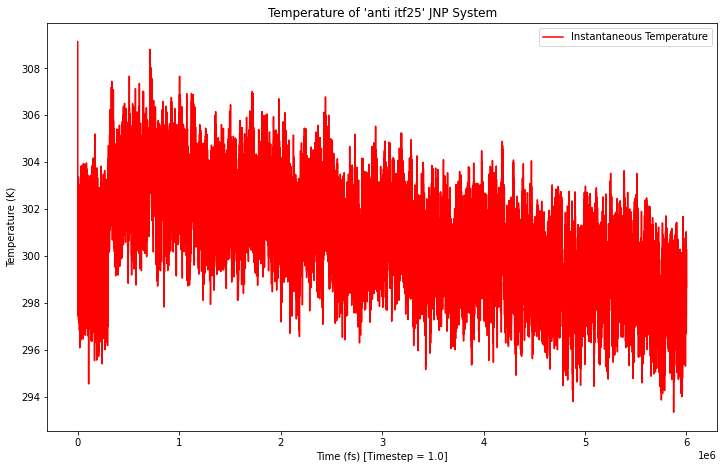

In [2]:
gr(av=False, start_time = 1400)

# Pressure


# # # # # #

Graph version 25/08/2023

# # # # # #

Filename (w/out .dat): pressure
final timestep: 6000000.0
number of data points: 60000
Timestep Value: 1.0
y-axis label: Pressure
Title: Pressure of 'anti itf25' JNP System


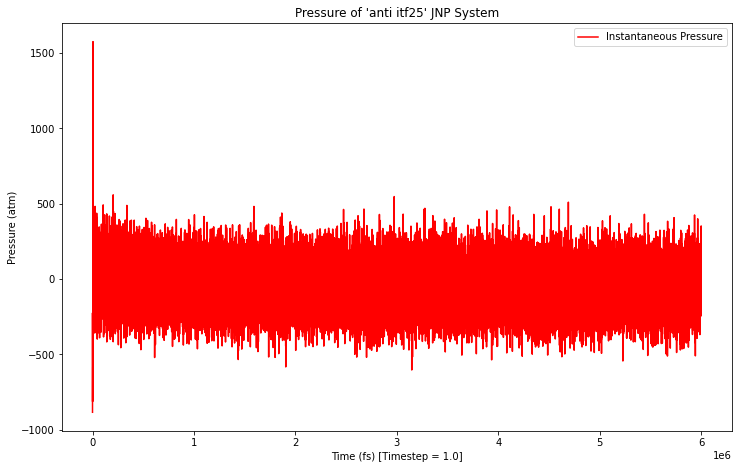

In [3]:
gr(av=False)

In [ ]:
gr(start_time=8000)

# Volume


# # # # # #

Graph version 25/08/2023

# # # # # #

Filename (w/out .dat): volume
final timestep: 6000000.0
number of data points: 60000
Timestep Value: 1.0
y-axis label: Volume
Title: Volume of 'anti itf25' JNP System


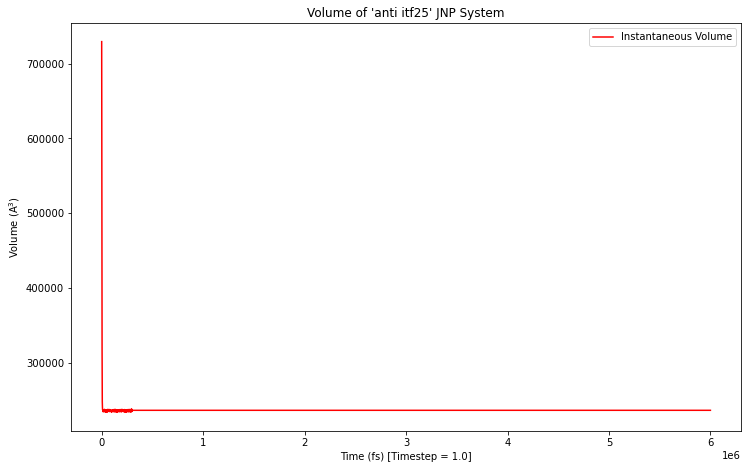

In [5]:
gr(av=False)


# # # # # #

Graph version 25/08/2023

# # # # # #

Filename (w/out .dat): volume
final timestep: 6000000.0
number of data points: 60000
Timestep Value: 1.0
y-axis label: Volume
Title: Volume (shortened) of 'anti itf25' JNP System
Starting data from data point 80
Ending with data point End
mean: 236326.3732142857


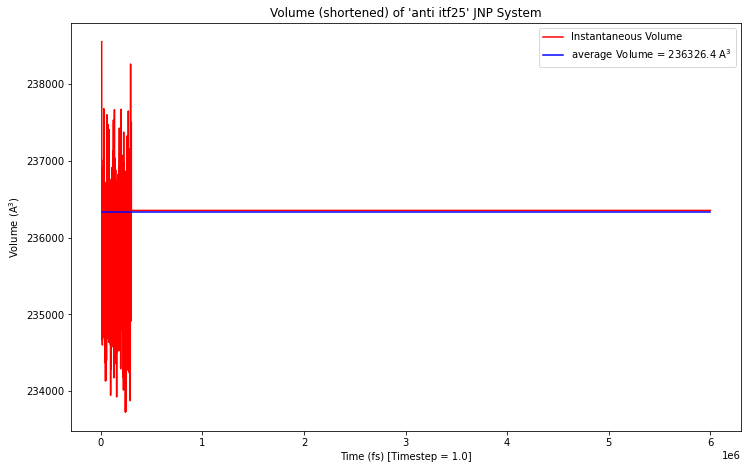

In [7]:
gr(start_time=8000)

# Separation


# # # # # #

Graph version 25/08/2023

# # # # # #

Filename (w/out .dat): separation
final timestep: 6000000.0
number of data points: 60000
Timestep Value: 1.0
y-axis label: Distance
Title: Separation of 'anti itf25' JNP System - full
mean: 33.71648906166657


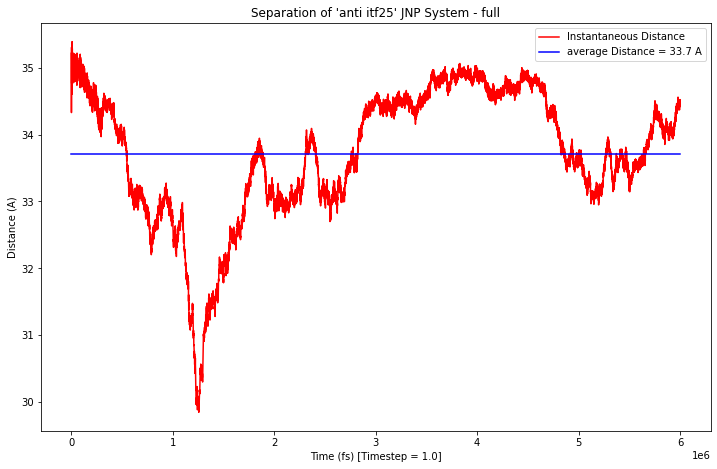

In [8]:
gr()


# # # # # #

Graph version 25/08/2023

# # # # # #

Filename (w/out .dat): separation
final timestep: 6000000.0
number of data points: 60000
Timestep Value: 1.0
y-axis label: Distance
Title: Separation of 'anti itf25' JNPs - NEMD
Starting data from data point 2000
Ending with data point 5000000
mean: 33.675633420833265
Output graph filename: separation-NEMD


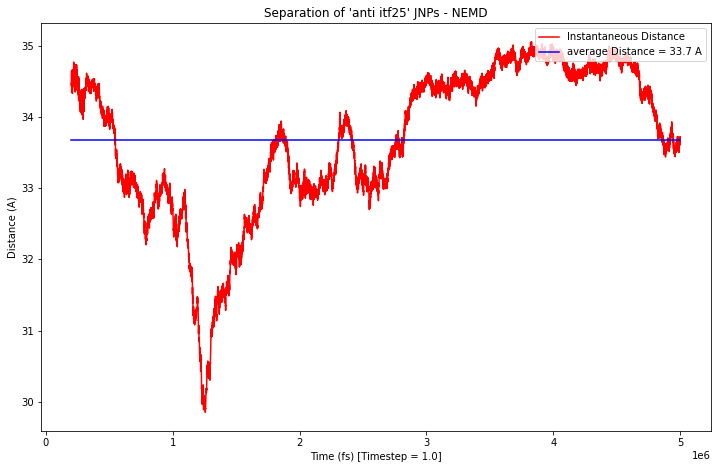

In [17]:
gr(con=True, start_time=200000, end_time=5000000)

# Forces


# # # # # #

Graph version 25/08/2023

# # # # # #

Filename (w/out .dat): forces
final timestep: 6000000.0
number of data points: 60000
Timestep Value: 1.0
y-axis label: Force
Title: Forces on 'JNP' A - equilibration
Starting data from data point 0
Ending with data point 200000
mean: -0.45267794660000016
Standard Deviation: 52.61517476548685
Output graph filename: forces_A-equilibration


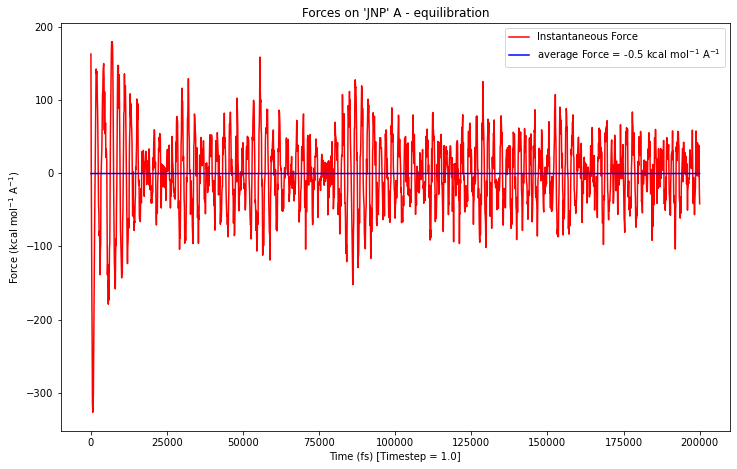

In [13]:
gr(err = True,end_time = 200000,con=True)


# # # # # #

Graph version 25/08/2023

# # # # # #

Filename (w/out .dat): forces
final timestep: 6000000.0
number of data points: 60000
Timestep Value: 1.0
y-axis label: Force
Title: Forces on 'JNP' B - equilibration
Starting data from data point 0
Ending with data point 200000
mean: 0.45202026667999906
Output graph filename: forces_B-equilibration


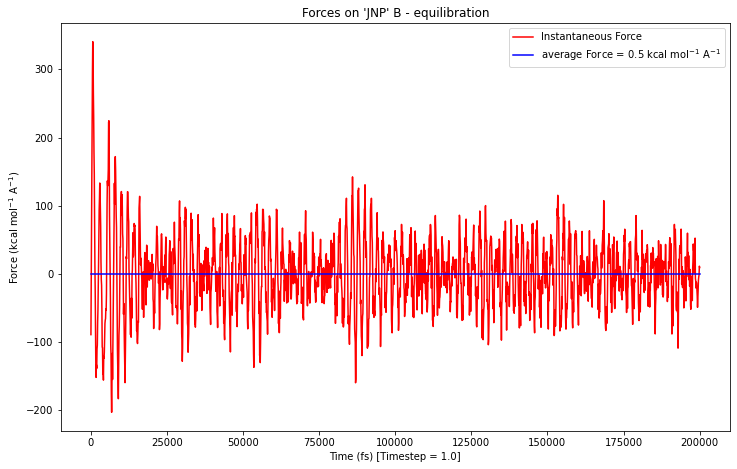

In [14]:
gr(data_line=2, end_time=200000, con=True)


# # # # # #

Graph version 25/08/2023

# # # # # #

Filename (w/out .dat): forces
final timestep: 6000000.0
number of data points: 60000
Timestep Value: 1.0
y-axis label: Force
Title: Forces on 'JNP' A - NEMD
Starting data from data point 2000
Ending with data point End
mean: -0.03609743276551731
Output graph filename: forces_B-NEMD


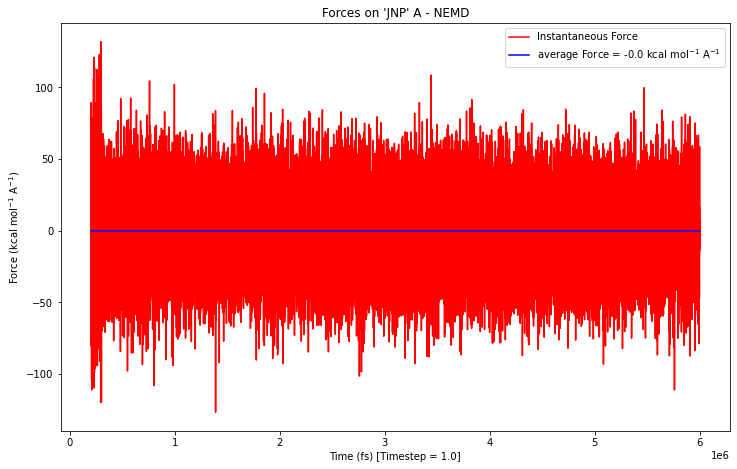

In [15]:
gr(data_line=1, start_time=200000, con=True)


# # # # # #

Graph version 25/08/2023

# # # # # #

Filename (w/out .dat): forces
final timestep: 6000000.0
number of data points: 60000
Timestep Value: 1.0
y-axis label: Force
Title: Forces on 'JNP' B - NEMD
Starting data from data point 2000
Ending with data point End
mean: 0.032827003212275684
Output graph filename: forces_B-equilibration


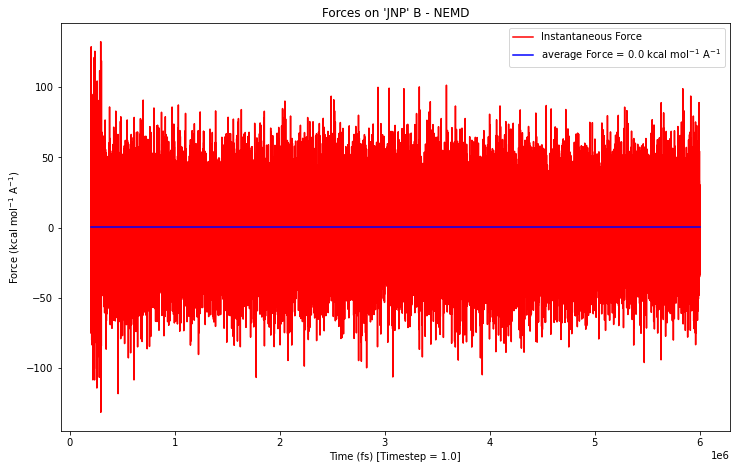

In [16]:
gr(data_line=2, start_time=200000, con=True)